# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
ny = temp[temp['State'] == 'New York']
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
ny['Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
fifteen = temp[temp['Temperature'] > 15]
fifteen

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [15]:
# option 1

cities = temp.drop('State', axis=1)
cit_fift = cities[temp['Temperature'] > 15]
cit_fift

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


In [18]:
# option 2

temp[temp['Temperature'] > 15][['City', 'Temperature']]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [28]:
temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)][['City', 'Temperature']]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [38]:
std = pd.DataFrame(temp.groupby('State').agg('Temperature').std())
std

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [39]:
employee = pd.read_csv("employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [41]:
# We can see there are integers and objects (which are usually strings or mixed types).

employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

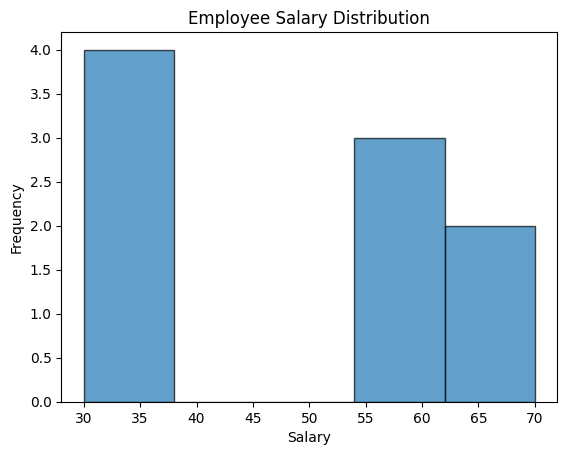

In [50]:
employee_sal = employee['Salary']


plt.hist(employee_sal, bins=5, edgecolor='k', alpha=0.7)

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Employee Salary Distribution')
plt.show()

In [ ]:
# So what we can see in the histogram is that no one from the data frame has a salary between 40 and 50.

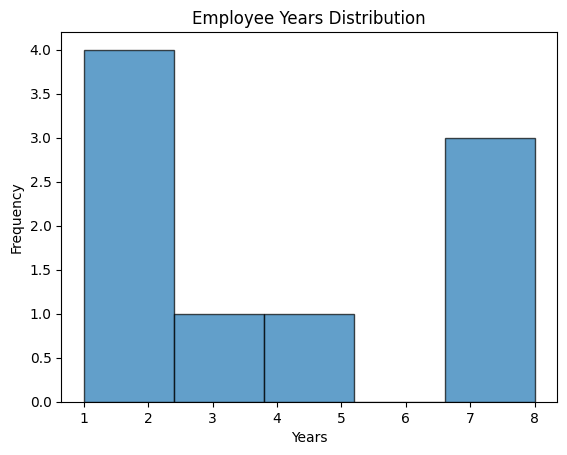

In [52]:
employee_sal = employee['Years']


plt.hist(employee_sal, bins=5, edgecolor='k', alpha=0.7)

plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Employee Years Distribution')
plt.show()

#### What's the average salary in this company?

In [53]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [54]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [55]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [67]:
# option 1

low = pd.DataFrame(employee[employee['Salary'] == 30]['Name'])
low

,Name
1,Maria
2,David


In [70]:
# option 2

lowest_salary = pd.DataFrame(employee.loc[employee['Salary'] == employee['Salary'].min(), ['Name', 'Salary']])
lowest_salary

,Name,Salary
1,Maria,30
2,David,30


#### Could you give all the information about an employee called David?

In [65]:
employee[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [69]:
David = pd.DataFrame(employee[employee['Name'] == 'David']['Salary'])
David

,Salary
2,30


#### Print all the rows where job title is associate

In [71]:
employee[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [73]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [74]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [77]:
employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [88]:
groups = employee.groupby('Years')['Salary'].mean().reset_index()
groups

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [89]:
groups2 = employee.groupby('Title')['Salary'].mean().reset_index()
groups2

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

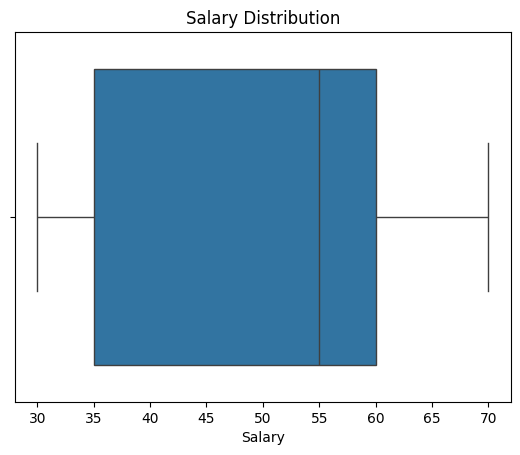

In [90]:
sns.boxplot(data=employee, x='Salary')
plt.title('Salary Distribution')
plt.show()

In [91]:
# print first quartile here

first_quartile = employee['Salary'].quantile(0.25)
print(f'First Quartile (25th percentile): {first_quartile}')

First Quartile (25th percentile): 35.0


In [92]:
# print third quartile here

third_quartile = employee['Salary'].quantile(0.75)
print(f'Third Quartile (75th percentile): {third_quartile}')

Third Quartile (75th percentile): 60.0


#### Is the mean salary per gender different?

In [95]:
gender = employee.groupby('Gender').agg('Salary').mean().reset_index()
gender 

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [97]:
minimum = employee.groupby('Department').agg({'Salary': 'min', 'Years': 'min'}).reset_index()
minimum

,Department,Salary,Years
0,HR,30,2
1,IT,30,1
2,Sales,55,2


In [98]:
mean = employee.groupby('Department').agg({'Salary': 'mean', 'Years': 'mean'}).reset_index()
mean

,Department,Salary,Years
0,HR,45.00,4.666667
1,IT,48.75,4.500000
2,Sales,55.00,2.500000


In [99]:
maximum = employee.groupby('Department').agg({'Salary': 'max', 'Years': 'max'}).reset_index()
maximum

,Department,Salary,Years
0,HR,70,8
1,IT,70,8
2,Sales,55,3


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [101]:
difference = employee.groupby('Department')['Salary'].agg(lambda x: x.max() - x.min()).reset_index()
difference

,Department,Salary
0,HR,40
1,IT,40
2,Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [103]:
orders = pd.read_csv("Orders.zip")
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [104]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [109]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [112]:
orders['UnitPrice'].mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [113]:
orders['UnitPrice'].max()

8142.75

In [114]:
orders['UnitPrice'].min()

0.0

#### Select all the customers we have in Spain

In [119]:
spanish = orders[orders['Country'] == 'Spain'][['CustomerID']]
spanish

,CustomerID
4250,12557
4251,12557
4252,12557
4253,12557
4254,12557
...,...
394733,17097
394734,17097
394735,17097
394736,17097


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [123]:
spanish.count()

CustomerID    2485
dtype: int64

In [121]:
len(spanish)

2485

#### Select all the customers who have bought more than 50 items ?

In [127]:
fifty = orders[orders['Quantity'] > 50][['CustomerID']]
fifty

,CustomerID
46,13748
83,15291
96,14688
102,14688
174,16029
...,...
397720,18102
397721,16626
397729,16626
397761,15311


#### Select orders from Spain that are above 50 items

In [131]:
sporders = orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]
len(sporders)

39

#### Select all free orders

In [136]:
free = orders[orders['UnitPrice'] == 0]
len(free)

40

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [139]:
bag = orders[orders['Description'].str.contains('lunch bag')]
bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [140]:
lunch = orders[(orders['Description'].str.contains('lunch bag')) & (orders['year'] == 2011)]
lunch

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

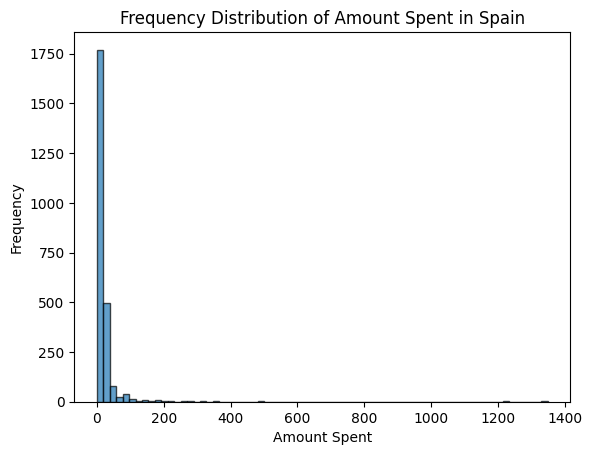

In [148]:
spain_orders = orders[orders['Country'] == 'Spain']


plt.hist(spain_orders['amount_spent'], bins=70, edgecolor='k', alpha=0.7)


plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Amount Spent in Spain')
plt.show()

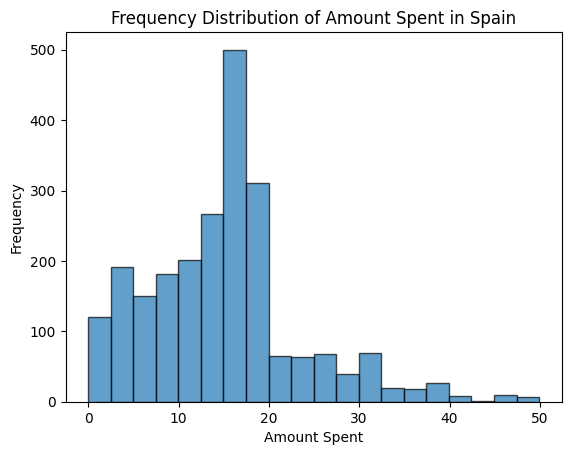

In [155]:
sporder = orders[(orders['Country'] == 'Spain') & (orders['amount_spent'] < 50)]

plt.hist(sporder['amount_spent'], bins=20, edgecolor='k', alpha=0.7)


plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Amount Spent in Spain')
plt.show()

#### Select all orders made in the month of August

In [149]:
orders[orders['month'] == 8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [157]:
orders[orders['month'] == 8]['Country'].value_counts()

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### What's the  average amount of money spent by country

In [162]:
orders.groupby('Country').agg({'amount_spent': 'mean'})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [174]:
orders[orders['UnitPrice'] == orders['UnitPrice'].max()]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [171]:
orders.groupby('year').agg({'amount_spent': 'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
